In [1]:
import mne
import os
import matplotlib.pyplot as plt

# This "magic" command tells Jupyter to show plots inside the notebook
%matplotlib inline

In [2]:
# This loads the .fif file you created with the 'load_and_save.py' script
data_file = 'subject_1_task_4_raw.fif'

if not os.path.exists(data_file):
    print(f"Error: Data file '{data_file}' not found.")
    print("Please run 'load_and_save.py' script first.")
else:
    raw = mne.io.read_raw_fif(data_file, preload=True)
    print("Data loaded successfully!")

Opening raw data file subject_1_task_4_raw.fif...
Isotrak not found
    Range : 0 ... 59999 =      0.000 ...   374.994 secs
Ready.
Reading 0 ... 59999  =      0.000 ...   374.994 secs...
Data loaded successfully!


In [3]:
# --- CLEANING STEP ---
# The channel names in the file have trailing dots (e.g., "Fc5.")
# We need to remove them to match the standard montage (e.g., "Fc5")

# Create a mapping from old name to new name
channel_mapping = {
    old_name: old_name.rstrip('.') for old_name in raw.ch_names
}

# Apply the renaming to the raw object
raw.rename_channels(channel_mapping)
print(f"Cleaned {len(channel_mapping)} channel names.")

# --- ORIGINAL CODE (NOW WITH FIX) ---
# Load the standard 10-05 montage
montage = mne.channels.make_standard_montage('standard_1005')

# And apply that map to our 'raw' object
# ✨ FIX: Add 'match_case=False' to ignore 'Fc5' vs 'FC5' mismatch
raw.set_montage(montage, match_case=False)

print("Montage applied successfully.")

Cleaned 64 channel names.
Montage applied successfully.


**Display Data for Task 4. Runs 6, 10 and 14**


Using matplotlib as 2D backend.


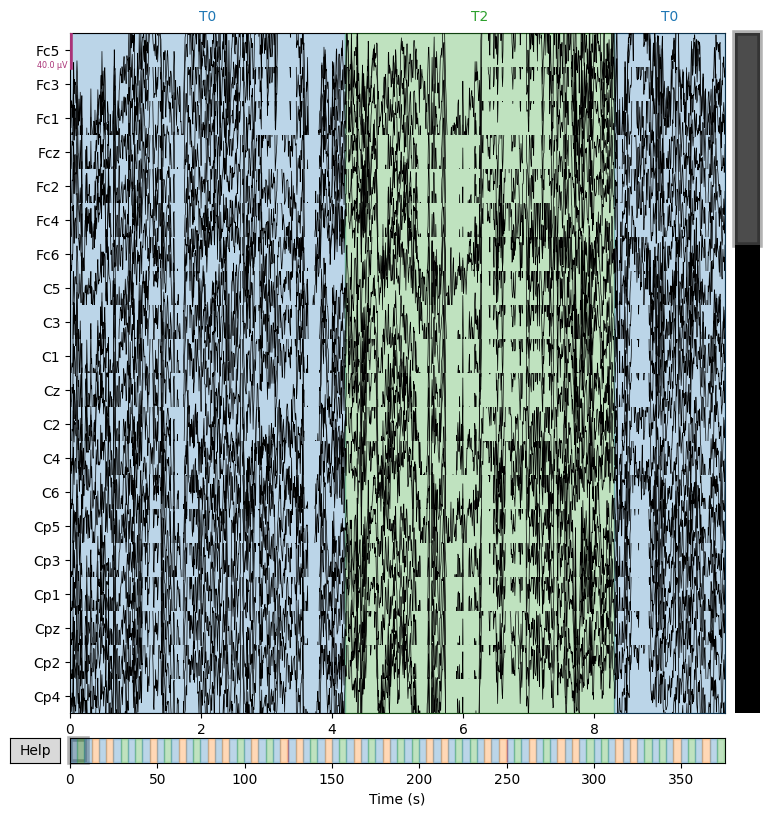

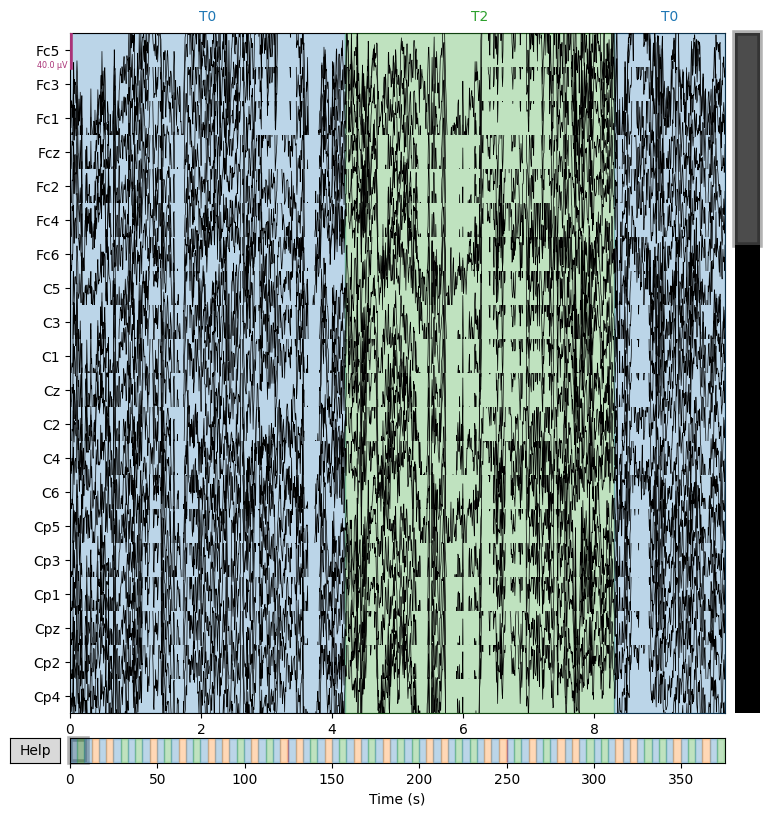

In [4]:
# Scrollable EEG view with events (if present as annotations)
raw.plot(block=True)


Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Event IDs: {np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}
First 10 events:
 [[   0    0    1]
 [ 672    0    3]
 [1328    0    1]
 [2000    0    2]
 [2656    0    1]
 [3328    0    2]
 [3984    0    1]
 [4656    0    3]
 [5312    0    1]
 [5984    0    3]]


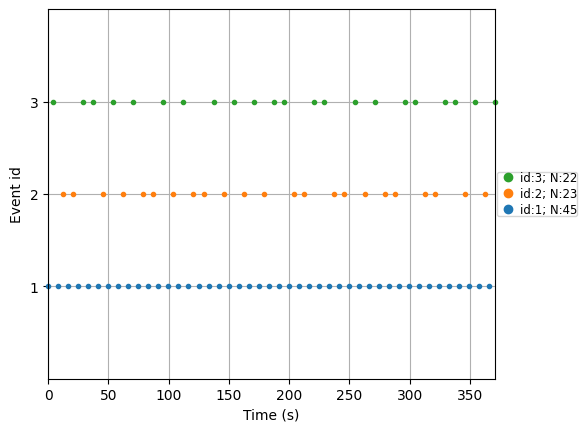

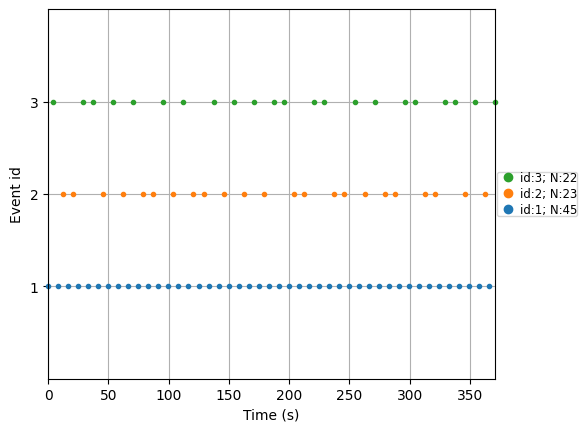

In [5]:
events, event_id = mne.events_from_annotations(raw)
print("Event IDs:", event_id)      # See which code corresponds to T0, T1, T2
print("First 10 events:\n", events[:10])

# Visualize event timing over the recording
mne.viz.plot_events(events, sfreq=raw.info['sfreq'])


Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
<Epochs | 45 events (all good), 0 – 4 s (baseline off), ~14.2 MiB, data loaded,
 'fists': 23
 'feet': 22>


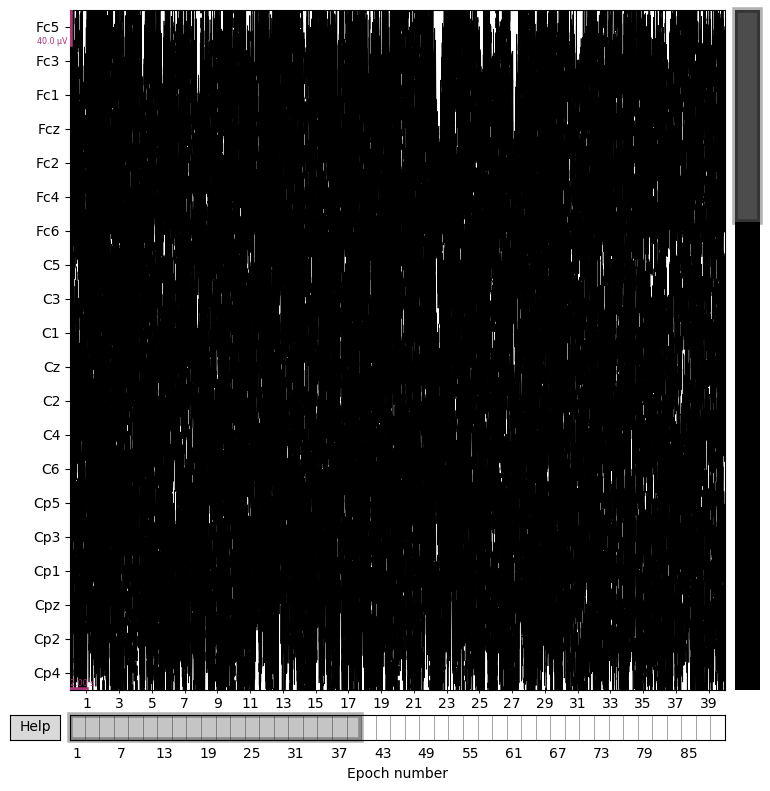

fists


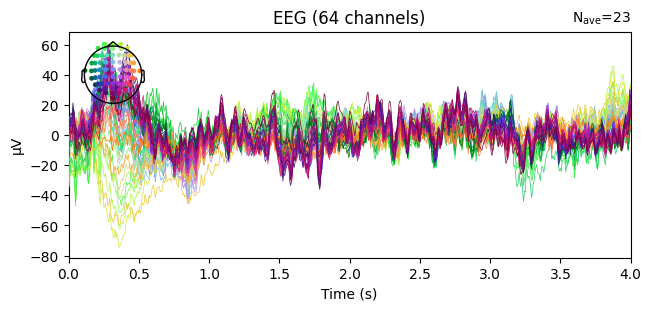

feet


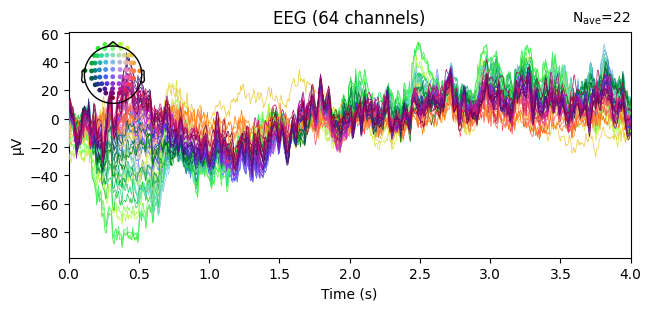

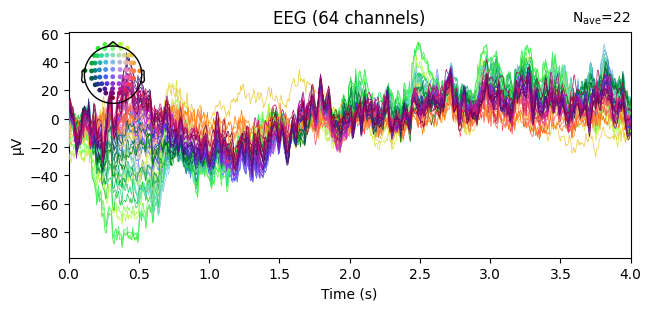

In [8]:
# Map T1/T2 to meaningful labels for Task 4
event_id_task4 = {
    "fists": event_id["T1"],   # imagined both fists
    "feet":  event_id["T2"],   # imagined both feet
}

# Cut fixed-length segments, e.g. 0–4 seconds after each cue
epochs = mne.Epochs(
    raw,
    events,
    event_id=event_id_task4,
    tmin=0.0,
    tmax=4.0,
    baseline=None,
    preload=True
)

# 3a) Quick summary
print(epochs)

# 3b) Plot all trials as stacked traces
epochs.plot(block=True)

# 3c) Plot the average (ERP) for each class
print("fists")

epochs["fists"].average().plot()
print("feet")
epochs["feet"].average().plot()


**Some random shit**

In [9]:
# Just put 'raw.info' on the last line to get a nice summary
raw.info

<Info | 11 non-empty values
 bads: []
 ch_names: Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, last_name: X, sex: 0>
>

In [15]:
print(raw.annotations)

<Annotations | 94 segments: BAD boundary (2), EDGE boundary (2), T0 (45), ...>


Plotting sensor locations...


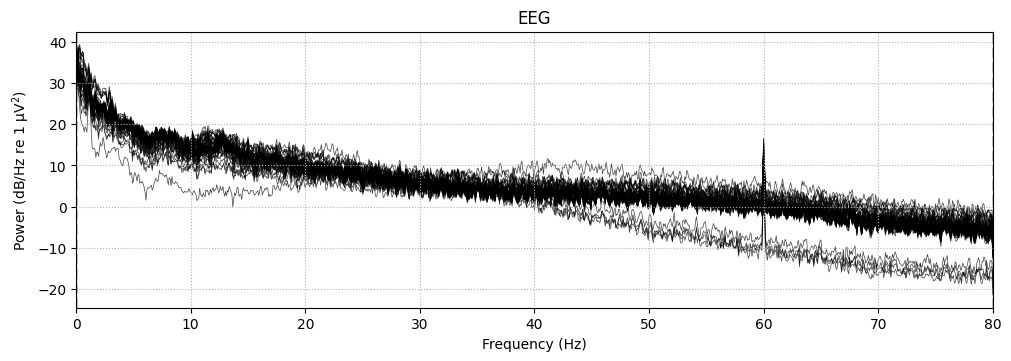

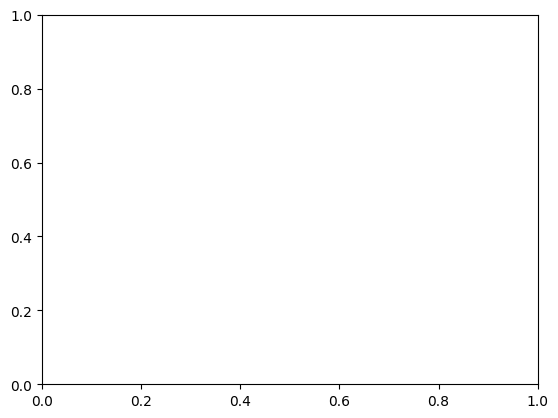

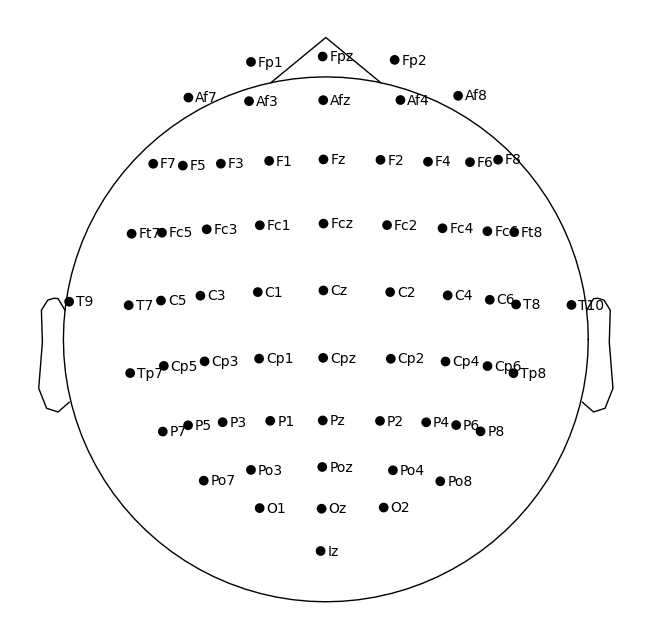

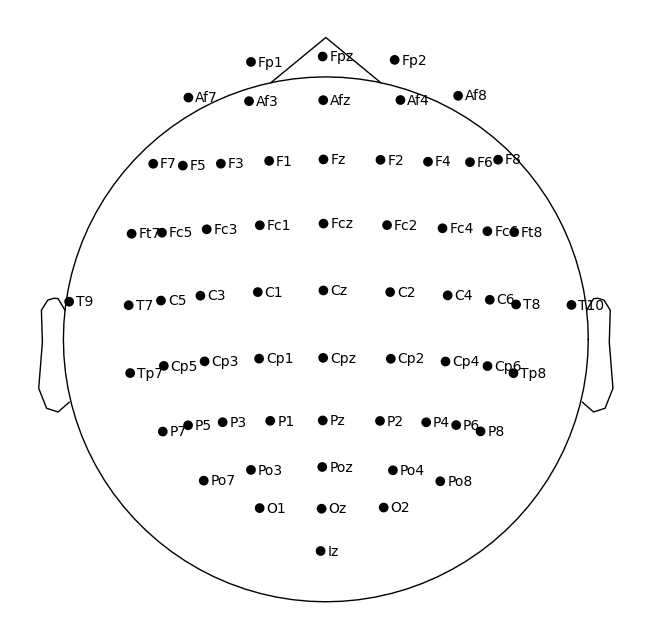

In [10]:
# This plot will now work because of Cell 3
print("Plotting sensor locations...")
raw.plot_sensors(show_names=True)

Plotting Power Spectral Density (PSD)...
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


/home/leon/Desktop/Uni/AML/.aml_tut/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


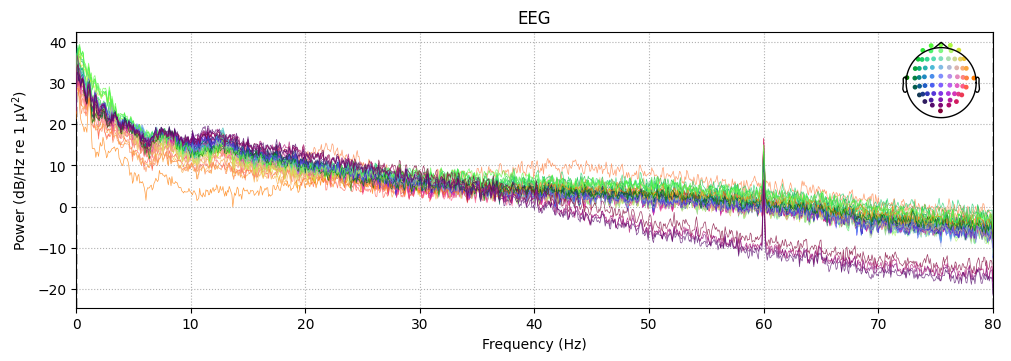

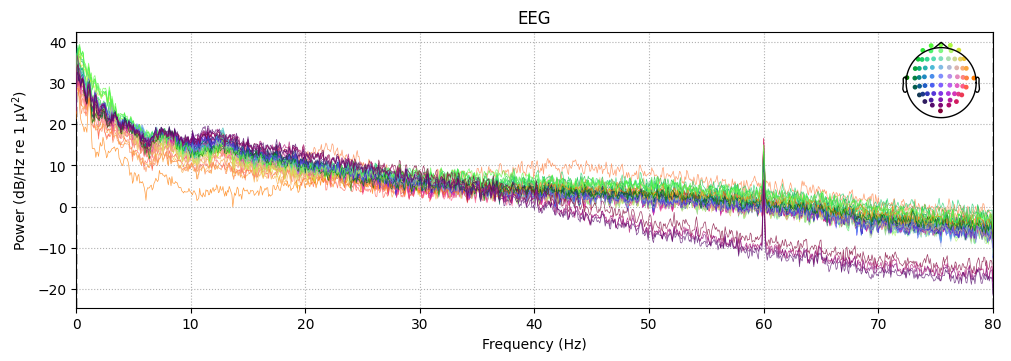

In [11]:
# This helps you see the frequency content of your data
print("Plotting Power Spectral Density (PSD)...")
raw.compute_psd().plot()

In [12]:
# This prints the "table" of all events (your labels)
# T1 = imagine fists, T2 = imagine feet
print("Showing all experimental event annotations:")
print(raw.annotations)

Showing all experimental event annotations:
<Annotations | 94 segments: BAD boundary (2), EDGE boundary (2), T0 (45), ...>


In [13]:
# We map the string labels ('T1', 'T2') to integer IDs
# This is what your machine learning model will use
event_id = {
    'T1': 1,  # Fists
    'T2': 2   # Feet
}

In [16]:
# 1. Get the 'events' (timestamps and IDs) from annotations
events, _ = mne.events_from_annotations(raw, event_id=event_id)

# 2. Create the epochs (data chunks)
epochs = mne.Epochs(
    raw,
    events,
    event_id=event_id,
    tmin=0.,
    tmax=4.0,
    baseline=None,  # <-- ✨ ADD THIS LINE to disable baseline correction
    preload=True,
    verbose=False
)

print("Epochs object created successfully.")

Used Annotations descriptions: [np.str_('T1'), np.str_('T2')]
Epochs object created successfully.


In [17]:
# This shows you your final, balanced dataset:
# How many samples (epochs) you have for each class.
print(epochs)

<Epochs | 45 events (all good), 0 – 4 s (baseline off), ~14.2 MiB, data loaded,
 'T1': 23
 'T2': 22>


Plotting all epochs, separated by class...
Using matplotlib as 2D backend.


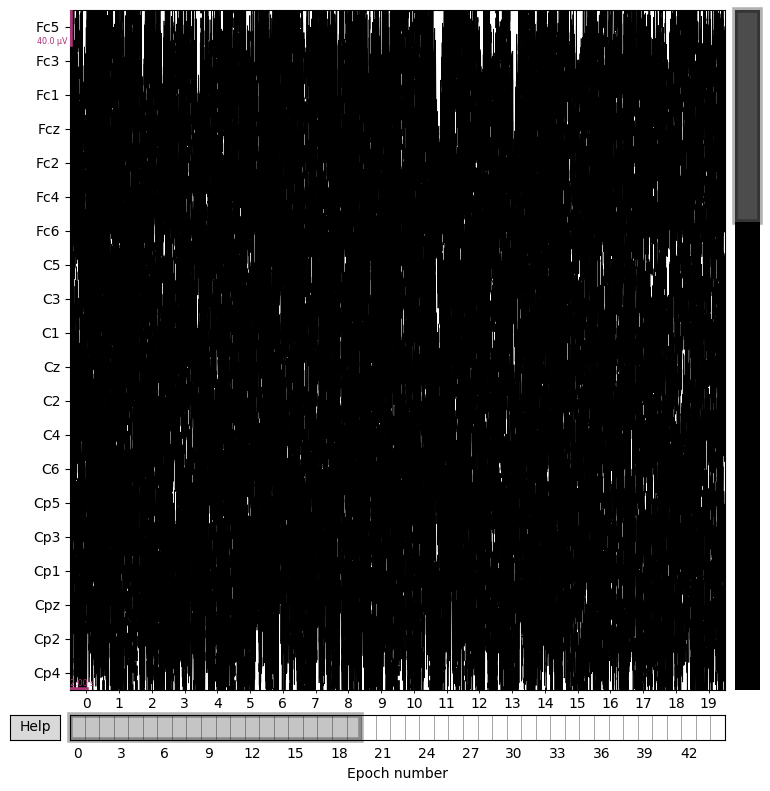

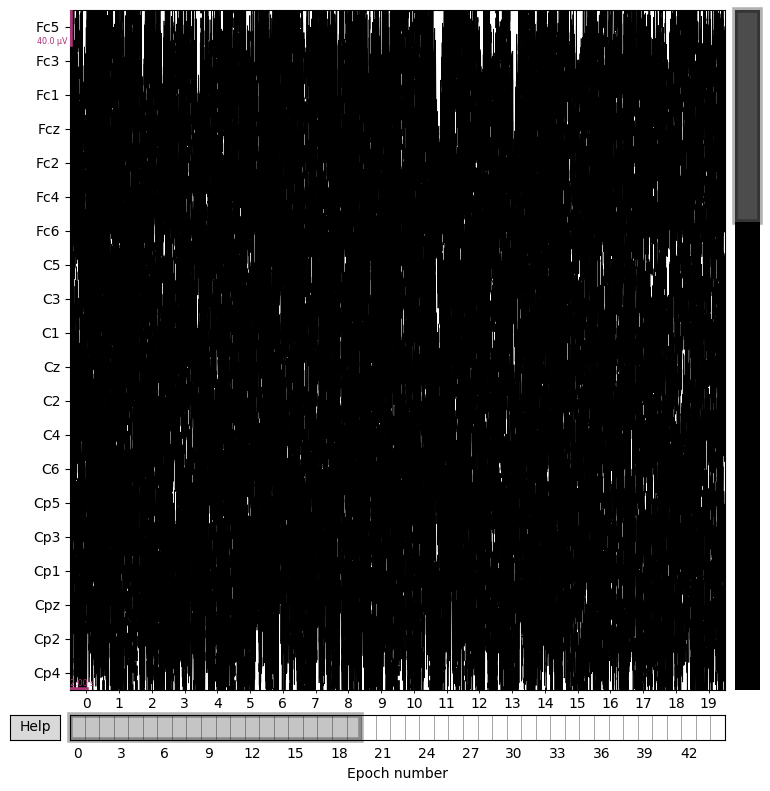

In [18]:
# This plot is very useful!
# It overlays all 'fists' trials (red) and 'feet' trials (blue)
# You can look for channels (like C3 or C4) where the lines separate.
print("Plotting all epochs, separated by class...")
epochs.plot()